### Detectando Phishing em Redes de Computadores -  Análise Exploratória de Dados

Dicionário de Features

0. **having\_IP\_Address** — URL usa **endereço IP** em vez de domínio (ex.: `http://123.45.67.89/...`).
1. **URL\_Length** — **Comprimento total** da URL.
2. **Shortining\_Service** — Uso de **encurtadores** (ex.: `bit.ly`, `tinyurl`) para mascarar o destino.
3. **having\_At\_Symbol** — Presença do símbolo **`@`** na URL.
4. **double\_slash\_redirecting** — **`//`** em posição incomum indicando possível **redirecionamento**.
5. **Prefix\_Suffix** — **Hífen (`-`)** no nome de domínio.
6. **having\_Sub\_Domain** — **Quantidade de subdomínios** (muitos “pontos”).
7. **SSLfinal\_State** — Sinais de **HTTPS/certificado** (não basta ter cadeado).
8. **Domain\_registeration\_length** — **Tempo de registro** do domínio (WHOIS).
9. **Favicon** — **Favicon** carregado de **outro domínio**.
10. **port** — Uso de **portas não padrão** (além de 80/443).
11. **HTTPS\_token** — Palavra **“https”** dentro do **domínio** para simular segurança.
12. **Request\_URL** — Objetos (imagens/scripts) carregados de **outro domínio**.
13. **URL\_of\_Anchor** — Muitos links `<a>` que apontam **para fora** ou para `#`/`javascript:void(0)`.
14. **Links\_in\_tags** — Links externos em **`<meta>`/`<script>`/`<link>`**.
15. **SFH** — **Destino do formulário** vazio/`about:blank` ou domínio diferente do da página.
16. **Submitting\_to\_email** — Formulário **envia dados por e-mail** (`mailto:`/`mail()`).
17. **Abnormal\_URL** — **Inconsistências** entre URL e dados de **WHOIS/identidade**.
18. **Redirect** — **Número de redirecionamentos** até a página final.
19. **on\_mouseover** — JS altera a **barra de status** ao passar o mouse (esconde URL real).
20. **RightClick** — **Desabilita o clique direito** (dificulta inspeção).
21. **popUpWidnow** — **Pop-ups** pedindo **informações sensíveis**.
22. **Iframe** — Uso de **`<iframe>`** (muitas vezes oculto) para embutir outra página.
23. **age\_of\_domain** — **Idade do domínio** (WHOIS).
24. **DNSRecord** — Existência/consistência de **registros DNS/WHOIS**.
25. **web\_traffic** — **Popularidade/tráfego** (ex.: Alexa).
26. **Page\_Rank** — **Autoridade**/ranqueamento da página.
27. **Google\_Index** — **Indexação** da página no Google.
28. **Links\_pointing\_to\_page** — **Backlinks** que apontam para a página.
29. **Statistical\_report** — Presença em **listas/feeds** de domínios/IPs maliciosos.
30. **Result** — **Rótulo** da amostra (legítimo/suspeito/phishing).


In [1]:
# Import das biliotecas
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


### Leitura do arquivo

In [2]:
df = pd.read_csv('phishing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   -1      11054 non-null  int64
 1   1       11054 non-null  int64
 2   1.1     11054 non-null  int64
 3   1.2     11054 non-null  int64
 4   -1.1    11054 non-null  int64
 5   -1.2    11054 non-null  int64
 6   -1.3    11054 non-null  int64
 7   -1.4    11054 non-null  int64
 8   -1.5    11054 non-null  int64
 9   1.3     11054 non-null  int64
 10  1.4     11054 non-null  int64
 11  -1.6    11054 non-null  int64
 12  1.5     11054 non-null  int64
 13  -1.7    11054 non-null  int64
 14  1.6     11054 non-null  int64
 15  -1.8    11054 non-null  int64
 16  -1.9    11054 non-null  int64
 17  -1.10   11054 non-null  int64
 18  0       11054 non-null  int64
 19  1.7     11054 non-null  int64
 20  1.8     11054 non-null  int64
 21  1.9     11054 non-null  int64
 22  1.10    11054 non-null  int64
 23  -1.11   110

#### Pré-Processamento de dados

In [3]:
# Renomeando  os nomes das colunas

# Colunas originais
old_cols_order = [
    "-1", "1", "1.1", "1.2", "-1.1", "-1.2", "-1.3", "-1.4", "-1.5",
    "1.3", "1.4", "-1.6", "1.5", "-1.7", "1.6", "-1.8", "-1.9", "-1.10",
    "0", "1.7", "1.8", "1.9", "1.10", "-1.11", "-1.12", "-1.13", "-1.14",
    "1.11", "1.12", "-1.15", "-1.16"
]

# Colunas nomeadas
new_cols_order = [
    "having_IP_Address",
    "URL_Length",
    "Shortining_Service",
    "having_At_Symbol",
    "double_slash_redirecting",
    "Prefix_Suffix",
    "having_Sub_Domain",
    "SSLfinal_State",
    "Domain_registeration_length",
    "Favicon",
    "port",
    "HTTPS_token",
    "Request_URL",
    "URL_of_Anchor",
    "Links_in_tags",
    "SFH",
    "Submitting_to_email",
    "Abnormal_URL",
    "Redirect",
    "on_mouseover",
    "RightClick",
    "popUpWidnow",
    "Iframe",
    "age_of_domain",
    "DNSRecord",
    "web_traffic",
    "Page_Rank",
    "Google_Index",
    "Links_pointing_to_page",
    "Statistical_report",
    "Result"
]

def renomear_colunas_phishing(df: pd.DataFrame) -> pd.DataFrame:
    """
    Renomeia as colunas do DF para os atributos do dataset de phishing,
    seguindo a ordem da lista.
    """
    df = df.copy()

    # Renomeia por posição 
    cols_as_str = list(map(str, df.columns))
    if cols_as_str == old_cols_order:
        df.columns = new_cols_order
        return df   
   
# Aplicando no df
df_renomeado = renomear_colunas_phishing(df)
print(df_renomeado.columns.tolist())


['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']


In [4]:
# Verificação de valores nulos
print('Existem valores nulos: \n', df_renomeado.isnull().values.any())
# Verifica se tem valor infinito
print('Existem valores infinito:\n',df_renomeado.columns[df_renomeado.isin([np.inf, -np.inf]).any()])

Existem valores nulos: 
 False
Existem valores infinito:
 Index([], dtype='object')


### Informações sobre a estrutura dos dados

In [5]:
df_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11054 non-null  int64
 1   URL_Length                   11054 non-null  int64
 2   Shortining_Service           11054 non-null  int64
 3   having_At_Symbol             11054 non-null  int64
 4   double_slash_redirecting     11054 non-null  int64
 5   Prefix_Suffix                11054 non-null  int64
 6   having_Sub_Domain            11054 non-null  int64
 7   SSLfinal_State               11054 non-null  int64
 8   Domain_registeration_length  11054 non-null  int64
 9   Favicon                      11054 non-null  int64
 10  port                         11054 non-null  int64
 11  HTTPS_token                  11054 non-null  int64
 12  Request_URL                  11054 non-null  int64
 13  URL_of_Anchor                11054 non-null  i

### Análise Exploratória dos Dados

In [6]:
# Base comum para as análises

# DataFrame base
DF = df_renomeado.copy()


def ordered_levels(series):
    """Ordena níveis discretos típicos {-1,0,1}"""
    lv = sorted(series.dropna().unique().tolist())
    for cand in [[-1,0,1], [-1,1], [0,1]]:
        if all(v in lv for v in cand) and len(lv) == len(cand):
            return cand
    return lv


def class_display_order(y: pd.Series, label_map: dict):
    """Ordem de exibição padrão: Phishing, Suspeito (se existir), Legítimo."""
    names = {k: label_map[k] for k in label_map}
    order = []
    if -1 in label_map: order.append(label_map[-1])       # Phishing
    if  0 in label_map: order.append(label_map[0])        # Suspeito (se existir)
    if  1 in label_map: order.append(label_map[1])        # Legítimo
    # Garante que só mantenha classes realmente presentes
    present = set(y.map(label_map))
    return [c for c in order if c in present]

def add_bar_labels(ax, fmt="{:.1f}%", center=False, txt_color="white", min_height=0.0, offset=0.5):
    """Anotações em barras """
    for p in ax.patches:
        h = p.get_height()
        if h <= min_height:
            continue
        if center:
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + h/2
            ax.text(x, y, fmt.format(h), ha='center', va='center', fontsize=9, color=txt_color)
        else:
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + h + offset
            ax.text(x, y, fmt.format(h), ha='center', va='bottom', fontsize=9, color='black')

plt.rcParams.update({'axes.grid': False})


#####  Distribuição de classes

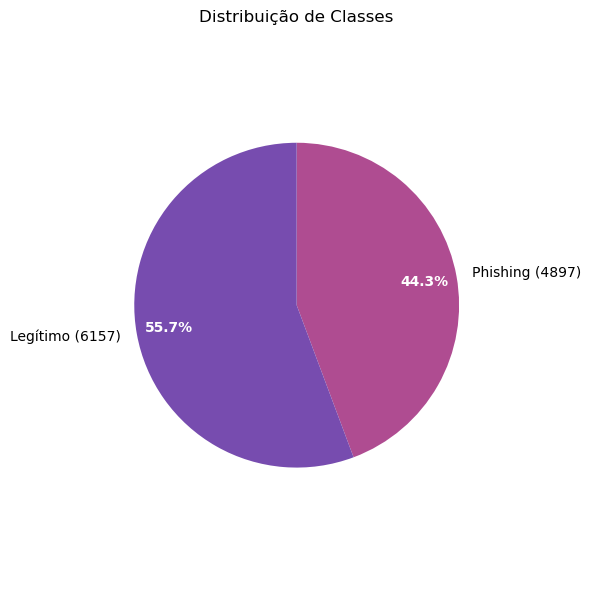

In [7]:
# Distribuição de classes
y = DF['Result']

# label_map FIXO já definido no BLOCO 0:
label_map = {-1: "Phishing", 0: "Suspeito", 1: "Legítimo"}

# Contagem e porcentagem por classe (na ordem numérica)
counts = y.value_counts(dropna=False).sort_index()
perc   = y.value_counts(normalize=True, dropna=False).sort_index() * 100

# Rótulos (inclui contagem)
labels = [f"{label_map.get(c, str(c))} ({counts.loc[c]})" for c in counts.index]

# Cores locais (somente aqui)
class_colors = {
    'Phishing':  '#AF4C91',
    'Suspeito':  '#FFC857',
    'Legítimo':  '#774CAF'
}
slice_colors = [class_colors.get(label_map.get(c, str(c)), '#888888') for c in counts.index]

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    counts.values,
    labels=labels,
    colors=slice_colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    pctdistance=0.8
)
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.title("Distribuição de Classes")
plt.axis('equal')  

plt.tight_layout()
plt.show(); plt.close()

##### **Conclusões:**


 - O gráfico de mostra a proporção das  classes Legítimo 55,7% e Phishing 44,3% , apresentando um leve desbalanceamento.

 - O desbalanceamento não é severo, mas deverá ser tratado para aplicação das modelagens.

#### Contagem de Subdomínios por Classe

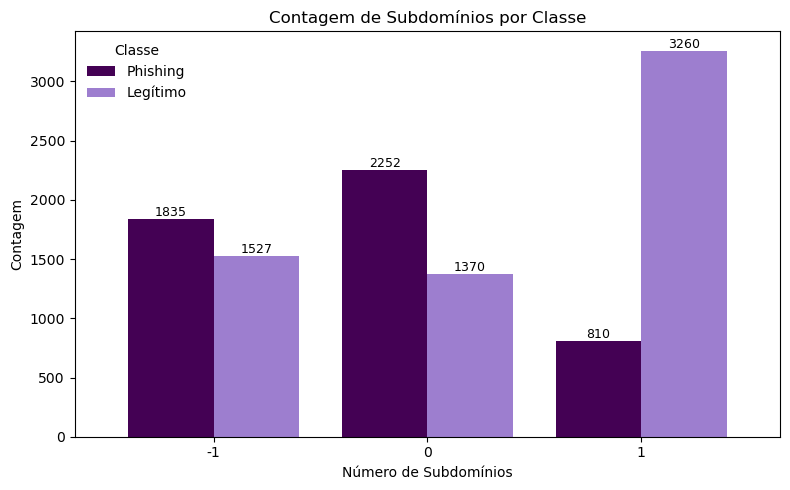

In [8]:
# Contagem de Subdomínios por Classe

feat = 'having_Sub_Domain'
y = DF['Result']

ct = DF.groupby(feat)['Result'].value_counts().unstack().fillna(0).astype(int)
ct = ct.reindex(index=ordered_levels(DF[feat]))

present_classes_num = [k for k in [-1, 0, 1] if k in ct.columns]
ct.columns = [label_map.get(c, str(c)) for c in ct.columns]
class_order = [label_map[k] for k in present_classes_num]

colors_local = {
    'Phishing':  '#440154',
    'Suspeito':  '#FDE725',
    'Legítimo':  '#9D7ECF',
}

ax = ct[class_order].plot(kind='bar', figsize=(8,5), width=0.8,
                          color=[colors_local[c] for c in class_order])
ax.set_title('Contagem de Subdomínios por Classe')
ax.set_xlabel('Número de Subdomínios')
ax.set_ylabel('Contagem')
ax.set_xticklabels([str(i) for i in ct.index], rotation=0)
ax.legend(title='Classe', frameon=False)

add_bar_labels(ax, fmt="{:.0f}", center=False)

plt.tight_layout()
plt.show(); plt.close()


##### **Conclusões:**

Legenda do gráfico:

- **-1**: Indica que a URL tem subdomínios moderados.

- **0**: Indica que a URL tem poucos ou nenhum subdomínio.

- **1**: Indica que a URL tem muitos subdomínios.

O gráfico mostra a distribuição dessas de subdomínios por classes:

- Para o valor `1`, 80% das URLs são Legítimas.

- Para o valor `0`,  62% das URLs são Phishing.

- Para o valor `-1` , 55% das URLs são Phishing.

A existência de um subdomínio é uma característica do site. Cibercriminosos frequentemente usam subdomínios para criar URLs falsas que parecem legítimas. 

Eles podem, por exemplo, criar um subdomínio com um nome de serviço conhecido para enganar os usuários. Portanto, a presença de muitos subdomínios pode ser um sinal de alerta, pois é uma tática comum para tentar confundir e enganar as pessoas. 

#### Proporção de Phishing por valor de Request URL

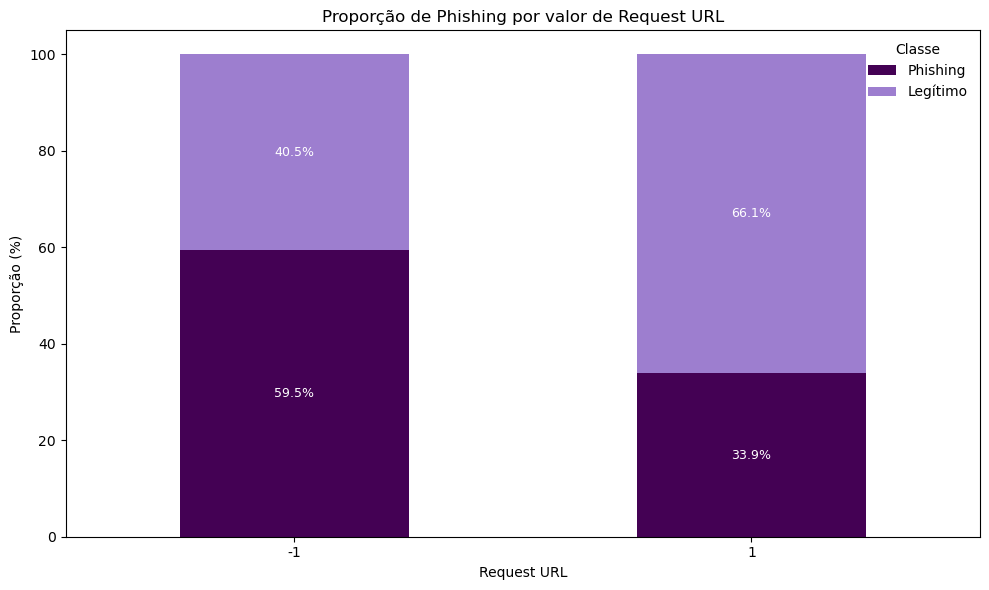

In [9]:
# #### Composição percentual por valor de Request URL
feat = 'Request_URL'

# Tabela de contagens e ordem dos níveis
ct = (DF.groupby([feat, 'Result']).size().unstack().fillna(0).astype(int))
ct = ct.reindex(index=ordered_levels(DF[feat]))

# Mapeia colunas para nomes legíveis e define ordem de classes presentes
ct = ct.rename(columns=label_map)
class_order = [label_map[k] for k in [-1, 0, 1] if k in DF['Result'].unique() and k in label_map]

# Converte para porcentagem por linha
pct = ct.div(ct.sum(axis=1), axis=0).fillna(0) * 100

# Cores locais 
colors_local = {'Phishing': '#440154', 'Suspeito': '#B197FC', 'Legítimo': '#9D7ECF'}

# Plot
ax = pct[class_order].plot(kind='bar', stacked=True, figsize=(10,6),
                           color=[colors_local[c] for c in class_order])
ax.set_title("Proporção de Phishing por valor de Request URL")
ax.set_xlabel("Request URL")
ax.set_ylabel("Proporção (%)")
ax.set_xticklabels([str(i) for i in pct.index], rotation=0)
ax.legend(title="Classe", loc='upper right', frameon=False)

# Rótulos 
add_bar_labels(ax, fmt="{:.1f}%", center=True, txt_color="white")

plt.tight_layout()
plt.show(); plt.close()


##### **Conclusões:**

O gráfico mostra a composição das classes para cada valor de Request URL

- **Request URL = -1:**, Indica que a URL do site está carregando uma alta proporção de objetos (como imagens ou scripts) de outro domínio. 

    Essa característica é um forte indicador de phishing, correspondendo a 59.5% dos casos nesta categoria.

- **Request URL =  1:**, Indica que a URL do site está carregando a maioria de seus objetos do próprio domínio.

     Esse é um comportamento mais comum em sites legítimos, que representam 66.1% dos casos nesta categoria.

Esse feature é discriminativa, pois valores bons "1" estão associados a legitimidade e ruins "-1" aumentam o risco de phishing.


#### Composição de classes por valor de URL Anchor

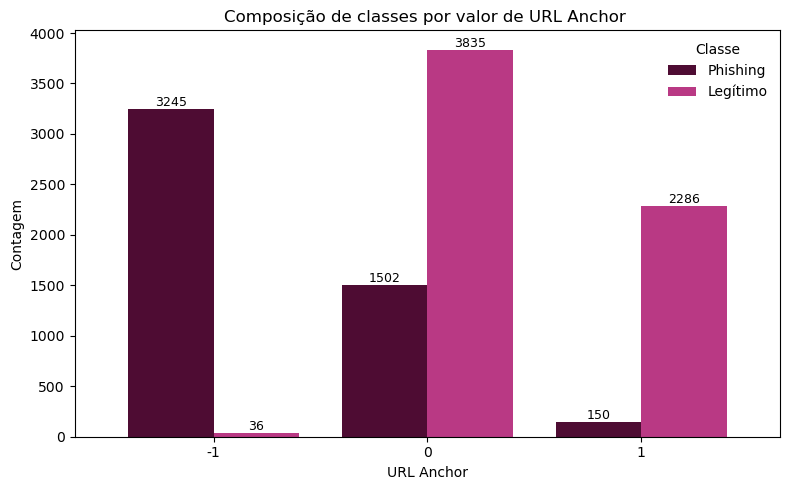

In [10]:
#  Composição de classes por valor de URL Anchor 
feat = 'URL_of_Anchor'

# Tabela de contagens 
ct = (DF.groupby([feat, 'Result']).size().unstack().fillna(0).astype(int))
ct = ct.reindex(index=ordered_levels(DF[feat]))

# Ordem das classes presentes 
present_num  = [k for k in [-1, 0, 1] if k in ct.columns]
class_order  = [label_map[k] for k in present_num]

# Renomeia colunas para nomes legíveis
ct = ct.rename(columns=label_map)

# Cores locais 
colors_local = {
    'Phishing':  "#4E0C33",
    'Suspeito':  "#80074D",
    'Legítimo':  "#B93984",
}

ax = ct[class_order].plot(
    kind='bar', figsize=(8,5), width=0.8,
    color=[colors_local.get(c, "#888888") for c in class_order]
)

ax.set_title("Composição de classes por valor de URL Anchor ")
ax.set_xlabel("URL Anchor")
ax.set_ylabel("Contagem")
ax.set_xticklabels([str(i) for i in ct.index], rotation=0)
ax.legend(title="Classe", frameon=False)

add_bar_labels(ax, fmt="{:.0f}", center=False)

plt.tight_layout()
plt.show(); plt.close()


##### **Conclusões:**

Legenda do gráfico:

- **-1**: Indica que a URL tem uma alta proporção de links (âncoras) que apontam para fora do domínio ou para scripts. Essa característica está fortemente associada a sites de phishing.

- **0**: Representa uma proporção intermediária de links externos. Sites com esse valor tendem a ser legítimos

- **1**: Indica que a URL tem poucos ou nenhum link que aponte para fora do domínio. Essa característica é um forte indicativo de um site legítimo.

O gráfico compara as contagens de Phishing e Legítimo para cada valor codificado de URL Anchor:

- Para o valor `1`, 98,9% das URLs são Legítimas.

- Para o valor `0`,  71,9% das URLs são Legítimas.

- Para o valor `-1` , 93,8% das URLs são Phishing.



#### Proporção de Phishing por valor de Links in tags

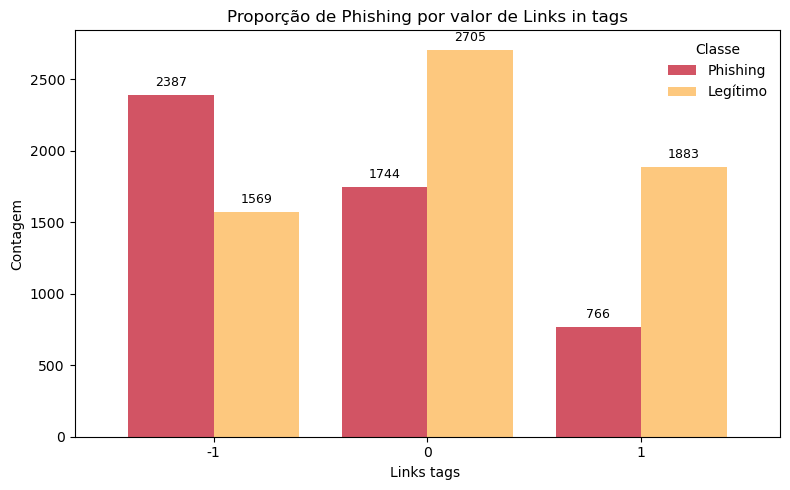

In [11]:
#### Proporção de Phishing por valor de Links in tags
feat = 'Links_in_tags'

ct = DF.groupby(feat)['Result'].value_counts().unstack().fillna(0).astype(int)
ct = ct.reindex(index=ordered_levels(DF[feat]))
col_order_num = [k for k in [-1,0,1] if k in DF['Result'].unique()]
ct = ct[[c for c in col_order_num if c in ct.columns]]
ct.columns = [label_map[c] for c in ct.columns]

desired_order = ['Phishing', 'Suspeito', 'Legítimo']
class_names_local = [c for c in desired_order if c in ct.columns]


colors_local = {
    'Phishing':  "#D25464",  
    'Legítimo':  "#FDC87E",  
}

ax = ct[class_names_local].plot(
    kind='bar', figsize=(8,5), width=0.8,
    color=[colors_local[n] for n in class_names_local]
)

ax.set_title("Proporção de Phishing por valor de Links in tags")
ax.set_xlabel("Links tags ")
ax.set_ylabel("Contagem")
ax.set_xticklabels([str(i) for i in ct.index], rotation=0)
ax.legend(title="Classe", frameon=False)


y_max = ct.values.max() if ct.size else 0
offset = max(y_max * 0.015, 0.5)
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.text(p.get_x() + p.get_width()/2, h + offset, f"{int(h)}",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show(); plt.close()


##### **Conclusões:**

Legenda do gráfico:

- **-1**: Indica que a URL tem uma alta proporção de links externos em tags específicas como 'meta', 'script' e 'link'. Este valor está fortemente associado a sites de phishing.

- **0**: Representa uma proporção intermediária de links externos nessas tags. Sites com este valor tendem a ser legítimos.

- **1**: Indica uma baixa proporção de links externos nessas tags. Assim como o valor 0, este valor está mais associado a sites legítimos.

O gráfico compara as contagens de Phishing e Legítimo para cada valor codificado de Links in tags: 

- Para o valor `1`, 71% das URLs são Legítimas.

- Para o valor `0`,  61% das URLs são Legítimas.

- Para o valor `-1` , 60% das URLs são Phishing.

In [12]:
# Salva em CSV
df_renomeado.to_csv("dataset_modelo_phishing.csv", index=False)
print("Arquivo Salvo")


Arquivo Salvo


#### **Considerações Finais**:

Com base na análise exploratórai dos dados, foi possível observar que o conjunto está levemente desbalanceado (≈55,7% legítimo vs 44,3% phishing).

As features analisadas mostram padrão monotônico: valores **1** tendem a indicar **legitimidade**, enquanto **−1** é sinal de risco de **phishing**. Em força de sinal, **`URL_of_Anchor`** se destaca (−1 ≈ 99% phishing; 0 ≈ 72% legítimo; 1 ≈ 94% legítimo). **`Subdomínios`** também discrimina bem (1 ≈ 80% legítimo; 0/−1 favorecem phishing). **`Request_URL`** e **`Links_in_tags`** têm efeito consistente, porém moderado: −1 aumenta a proporção de phishing (≈59–60%), e 0/1 elevam a de legítimos (≈61–71% ou mais).

Para aplicar técnicas de machine learning  e obter bons resultados, será necessário atentar-se para o balanceamento das classes.